# 0. Libraries

In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations

# Importing preprocessing and model selection modules from sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split  # For splitting the data into train and test sets
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels
from sklearn.preprocessing import OneHotEncoder  # For one-hot encoding categorical features
import matplotlib.pyplot as plt  # For data visualization
import warnings  # To handle warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # Ignoring future warnings
from sklearn.utils import shuffle  # For shuffling the data

# Importing additional modules from sklearn
from sklearn.compose import ColumnTransformer  # For applying different preprocessing to different columns
from sklearn.model_selection import train_test_split  # Reimported train_test_split (duplicate import)
from sklearn.pipeline import Pipeline  # For creating a pipeline of transformations and models
from sklearn.preprocessing import OneHotEncoder  # Reimported OneHotEncoder (duplicate import)
from sklearn.ensemble import RandomForestClassifier  # For random forest model
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.tree import DecisionTreeClassifier  # For decision tree model

# Importing DiCE (Diverse Counterfactual Explanations) library
import dice_ml  # For generating counterfactual explanations
from dice_ml.utils import helpers  # Importing helper functions from DiCE

# Importing additional libraries
import pickle  # For saving and loading models
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc  # For evaluating model performance
from sklearn.model_selection import cross_val_score, KFold  # For cross-validation


# 1. Cleaning

In [2]:
# Load the dataframe from a csv file
df = pd.read_csv('CensusAdultIncome.csv')

### Exploring the Data Frames

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### Features Description

- **workclass**: A categorical feature representing the type of income source, such as *private*, *self-employment*, and *government employment*. Some missing values are present.
  
- **fnlwgt**: An integer feature, though no specific description is provided for it. No missing values are present.

- **education**: A categorical feature representing the highest level of education attained, such as *Bachelors*, *Masters*, or *Doctorate*.

- **education-num**: An integer feature that represents the numerical encoding of the **education** level. It is directly correlated to the education categories.

- **occupation**: A categorical feature representing the type of occupation, such as *managerial*, *technical*, and *service-related* jobs. Some missing values are present.

- **native-country**: A categorical feature representing the country of origin, including countries such as the *United States*, *Canada*, and *India*. Some missing values are present.

- **income**: The target variable, a binary feature representing income level. The categories are *>50K* and *<=50K*. No missing values are present.


#### Cleaning the Target Variable and Making it Binary

In [5]:
#Target value has values with dots, therefore 4 catagories
df['income'] = df['income'].str.replace('.', '')

# Replace the values in the target column with string '0' and '1'.
df['income'] = df['income'].str.replace('<=50K', '0')  
df['income'] = df['income'].str.replace('>50K', '1')   

# Convert to integer
df['income'] = df['income'].astype(int)

#### Printing count and percentage of 'income' classes.

In [ ]:
# Calculate the counts of unique values in the 'class' column 
class_counts = df['income'].value_counts()

# Calculate the percentage of each unique value in the 'class' column by dividing 'class_counts' by its sum and then multiplying by 100.
class_percentages = class_counts / class_counts.sum() * 100

print('Class counts:\n' ,class_counts, '\n')
print('Percentage of each class: \n' ,class_percentages)
print('\nTotal number of rows: ', df.shape[0])

# Saving this for future use
a = df.shape[0]

Class counts:
 0    37155
1    11687
Name: income, dtype: int64 

Percentage of each class: 
 0    76.071823
1    23.928177
Name: income, dtype: float64

Total number of rows:  48842


#### Droping nan values

In [7]:
#Some values are like '?'. Replacing them as NaN 
df[df == '?'] = np.nan
# Dropping the rows with NaN values in  'workclass', 'occupation', 'native-country' for the test dataset
df.dropna(subset=['workclass', 'occupation', 'native-country'], inplace=True)
df.dropna( inplace=True)

Checking wheter Education and Education-number are similar.

In [8]:
print(df['education'].value_counts().head())
print()
print(df['education-num'].value_counts().head())

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
Name: education, dtype: int64

9     14783
10     9899
13     7570
14     2514
11     1959
Name: education-num, dtype: int64


From X set, education column is dropped as it is same with Education-num, which is already in numerical form.

In [9]:
df = df.drop(['education'], axis=1)

#### Count and percentage of Target classes values after droping NaN values 


In [11]:
# Calculate the counts of unique values in the 'class' column of 'df_class_feature' and store it in 'class_counts'.
class_counts = df['income'].value_counts()

# Calculate the percentage of each unique value in the 'class' column by dividing 'class_counts' by its sum and then multiplying by 100.
class_percentages = class_counts / class_counts.sum() * 100

print('Class counts:\n' ,class_counts, '\n')
print('Percentage of each class: \n' ,class_percentages)

b = df.shape[0]
print('\nNumber of rows after dropping NaN: ', b)
print('number of rows dropped: ', a-b)

Class counts:
 0    34014
1    11208
Name: income, dtype: int64 

Percentage of each class: 
 0    75.215603
1    24.784397
Name: income, dtype: float64

Number of rows after dropping NaN:  45222
number of rows dropped:  3620


# 2. Split data into separate fitting and test set

#### Creating X and y sets

In [12]:
# Creating X and y sets.income is the target variable and native country dropped because it has 41 unique values and occupation is very similar too workclass.
X = df.drop(['income', 'native-country', 'occupation'], axis=1) # Highly inbalanced columns
y = df['income']

#### Spliting the dataset into fitting data (70%) and test set (30%).

In [ ]:
# Splitting the dataset into training and testing sets
# X: Features dataset
# y: Target variable
# test_size=0.3: 30% of the data will be used for testing, 70% for training

X_fit, X_test, y_fit, y_test = train_test_split(X, y, test_size=0.3, random_state=1600)

#### The percentage of each class in the target variable for each set

In [14]:
# Defined a function to calculate and print the percentage of each class in the target variable
def calculate_class_percentage(y):
    # Initialize an empty dictionary to store class percentages
    class_percentage = {}
    
    # Calculate the total number of samples in the target variable
    total_samples = len(y)
    
    # Get the unique classes in the target variable
    unique_classes = set(y)
    
    # Iterate over each unique class
    for cls in unique_classes:
        # Count the number of occurrences of the current class in the target variable
        class_count = sum(y == cls)
        
        # Calculate the percentage of the current class
        percentage = (class_count / total_samples) * 100
        
        # Store the percentage in the dictionary with the class as the key
        class_percentage[cls] = percentage
    
    # Return the dictionary containing class percentages
    return class_percentage

In [15]:
# Calculate class percentages for each dataset
fit_class_percentage = calculate_class_percentage(y_fit)
test_class_percentage = calculate_class_percentage(y_test)

# Print class percentages for each dataset
print("Fit set class percentages:")
print(fit_class_percentage )
print("\nTest set class percentages:")
print(test_class_percentage)
print('\n Number of rows of X fit', X_fit.shape[0], '\n Number of rows of X test', X_test.shape[0],'\n Number of rows of Y fit', y_fit.shape[0],'\n Number of rows of y test', y_test.shape[0],)


Fit set class percentages:
{0: 75.54572737324278, 1: 24.454272626757227}

Test set class percentages:
{0: 74.44534532321073, 1: 25.55465467678927}

 Number of rows of X fit 31655 
 Number of rows of X test 13567 
 Number of rows of Y fit 31655 
 Number of rows of y test 13567


# 3. Random Forest, Logistig Regression, Decision Tree

### Random Forest Model Training and Evaluation
This function trains a Random Forest model on the given dataset and evaluates its performance.

#### Tasks Performed:
- **Model Training:** Trains a Random Forest classifier on the provided training data.
- **Prediction & Evaluation:** Makes predictions on the test set and calculates F1 score and ROC AUC score.
- **Performance Metrics:** Stores and returns the model's performance metrics.
#### Outputs:
- **model_RF:** Trained Random Forest model pipeline.
- **model_perf_metrics_rf:** DataFrame with model performance metrics (F1, ROC AUC).
- **roc_rf, f1_rf:** ROC AUC score and F1 score of the model.

In [16]:
def run_RF(X_fit, y_fit, X_test, y_test, model_name, i, j, k, estimator, depth):
    """
    Trains a Random Forest model and evaluates its performance on the test dataset.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    X_test (pandas.DataFrame): The test dataset.
    y_test (pandas.Series): The target variable of the test dataset.
    model_name (str): A name for the model to distinguish it in the performance metrics.
    i (int): The number of counterfactuals to be generated for each sample, for the experiment.
    j (int): The sample size to be used for counterfactual generation, for the experiment.
    k (int): The number of iterations to be run for each sample size and CF number combination.
    estimator (int): The number of trees in the forest.
    depth (int or None): The maximum depth of the tree. If None, nodes are expanded until all leaves are pure.

    Returns:
    model_RF (Pipeline): The trained Random Forest model pipeline.
    model_perf_metrics_rf (pandas.DataFrame): The performance metrics of the Random Forest model.
    roc_rf (float): The ROC AUC score of the Random Forest model.
    f1_rf (float): The F1 score of the Random Forest model.
    """

    # Preprocessing for categorical data using OneHotEncoding
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Define the transformations for preprocessing the data
    # Commented out the numerical transformer since it's not currently used
    # numerical_transformer = Pipeline(steps=[
    #     ('scaler', StandardScaler())])

    # Combine preprocessing steps into a single transformer
    transformations = ColumnTransformer(
        transformers=[
            # ('num', numerical_transformer, numerical),  # Placeholder for numerical transformer
            ('cat', categorical_transformer, categorical)],
        remainder='passthrough')

    # Define the Random Forest model as a pipeline
    clf_RF = Pipeline(steps=[('preprocessor', transformations), 
                             ('classifier', RandomForestClassifier(n_estimators=estimator, max_depth=depth))])

    # Fit the Random Forest model on the training data
    model_RF = clf_RF.fit(X_fit, y_fit)

    # Predict on the test dataset
    y_pred_rf = model_RF.predict(X_test)

    # Calculate the F1 score and ROC AUC score
    f1_rf = f1_score(y_test, y_pred_rf)
    roc_rf = roc_auc_score(y_test, y_pred_rf)

    # Get the size of the training data
    a = len(X_fit)

    # Saving the model performance metrics
    if depth is None:
        # If no depth is specified, use a different model name format
        models_rf = [('RF_{}'.format(model_name), k, j, i, a, f1_rf, roc_rf, 0, 0)]
    else:
        # Use a simplified model name format if depth is specified
        models_rf = [('RF_simp_{}'.format(model_name), k, j, i, a, f1_rf, roc_rf, 0, 0)]

    # Create a DataFrame to store the performance metrics
    model_perf_metrics_rf = pd.DataFrame(models_rf, 
                                         columns=['Model', 'Iteration', 'Sample Size', 'CF Num', 'X_fit Size', 
                                                  'F1 (%)', 'AUC (%)', 'F1 (%)_std', 'AUC (%)_std'])

    return model_RF, model_perf_metrics_rf, roc_rf, f1_rf

### Logistic Regression Model Training and Evaluation

This function trains a Logistic Regression model using the provided dataset and evaluates its performance.

#### Tasks Performed:
- **Model Training:** Trains a Logistic Regression classifier on the provided training dataset.
- **Prediction & Evaluation:** Predicts the test dataset and computes performance metrics such as F1 score and ROC AUC score.
- **Performance Metrics:** Saves and returns model performance metrics.

#### Outputs:
- **model_perf_metric_lr:** DataFrame with performance metrics (F1 score, AUC).
- **roc_lr, f1_lr:** ROC AUC and F1 scores of the model.

This function is to train and evaluate the Logistic Regression classifier and captures its key performance metrics.


In [17]:
def run_LR(X_fit, y_fit, X_test, y_test, model_name, i, j, k):
    """
    Trains a Logistic Regression model and evaluates its performance on the test dataset.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    X_test (pandas.DataFrame): The test dataset.
    y_test (pandas.Series): The target variable of the test dataset.
    model_name (str): A name for the model to distinguish it in the performance metrics.
    i (int): The number of counterfactuals to be generated for each sample, for the experiment.
    j (int): The sample size to be used for counterfactual generation, for the experiment.
    k (int): The number of iterations to be run for each sample size and CF number combination.

    Returns:
    model_perf_metric_lr (pandas.DataFrame): The performance metrics of the Logistic Regression model.
    roc_lr (float): The ROC AUC score of the Logistic Regression model.
    f1_lr (float): The F1 score of the Logistic Regression model.
    """
    
    # Preprocessing for categorical data using OneHotEncoding
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Preprocessing for numerical data using StandardScaler (commented out as it's not currently used)
    # numerical_transformer = Pipeline(steps=[
    #     ('scaler', StandardScaler())])

    # Bundle preprocessing for numerical and categorical data
    transformations = ColumnTransformer(
        transformers=[
            # ('num', numerical_transformer, numerical),  # Placeholder for numerical transformer
            ('cat', categorical_transformer, categorical)], 
        remainder='passthrough')

    # Define the Logistic Regression model as a pipeline
    clf_LR = Pipeline(steps=[('preprocessor', transformations), 
                             ('classifier', LogisticRegression(max_iter=1000))])

    # Fit the Logistic Regression model on the training data
    model_LR = clf_LR.fit(X_fit, y_fit)

    # Predict on the test dataset
    y_pred_lr = model_LR.predict(X_test)

    # Calculate the F1 score and ROC AUC score
    f1_lr = f1_score(y_test, y_pred_lr)
    roc_lr = roc_auc_score(y_test, y_pred_lr)

    # Get the size of the training data
    a = len(X_fit)

    # Save the model performance metrics
    models_lr = [('LR_{}'.format(model_name), k, j, i, a, f1_lr, roc_lr, 0, 0)]

    # Create a DataFrame to store the performance metrics
    model_perf_metric_lr = pd.DataFrame(models_lr, 
                                        columns=['Model', 'Iteration', 'Sample Size', 'CF Num', 'X_fit Size', 
                                                 'F1 (%)', 'AUC (%)', 'F1 (%)_std', 'AUC (%)_std'])

    return model_perf_metric_lr, roc_lr, f1_lr

### Running and Merging Default Model Metrics

Following function trains and evaluates default Random Forest and Logistic Regression models on the provided dataset, then merges their performance metrics into two separate dataframes.

#### Tasks Performed:
- **Train Models:** Runs Random Forest and Logistic Regression on the given training data.
- **Evaluate Performance:** Calculates key performance metrics (F1, ROC AUC) for both models on the test dataset.
- **Merge Metrics:** Merges the performance metrics into two dataframes, one for general use and the other for use with counterfactual datasets.

#### Outputs:
- **model_RF:** Trained Random Forest model.
- **model_perf_metrics_merged:** Dataframe containing merged performance metrics of both models.
- **model_perf_metrics_merged_only_with_cfs:** Identical dataframe, intended for use with counterfactuals dataset.

This function simplifies running default models, evaluating them, and collecting their metrics for further analysis.


In [18]:
def run_models_and_merge_metrics(X_fit, y_fit, X_test, y_test):
    """
    Trains Random Forest and Logistic Regression models on the given training data,evaluates their performance on the test data, and merges their performance metrics into two dataframes.

    Parameters:
    X_fit (DataFrame): Features for training the models.
    y_fit (Series): Target variable for training the models.
    X_test (DataFrame): Features for testing the models.
    y_test (Series): Target variable for testing the models.

    Returns:
    tuple: 
        - model_RF (RandomForestClassifier): The trained Random Forest model.
        - model_perf_metrics_merged (DataFrame): Dataframe containing merged performance metrics of the Random Forest and Logistic Regression models.
        - model_perf_metrics_merged_only_with_cfs (DataFrame): Another dataframe containing merged performance metrics, identical to the first but intended for use with a counterfactuals dataset.
    """
   
    # Running default Random Forest Once
    model_RF, model_perf_metric_rf, roc_rf, f1_rf = run_RF(X_fit, y_fit, X_test, y_test, 'default', 0, 0, 0, 100, None)
    
    # Running default Logistic Regression Once
    model_perf_metric_lr, auc, f1 = run_LR(X_fit, y_fit, X_test, y_test, 'default', 0, 0, 0)
    
    # Merging the default model performance metrics in a dataframe to accommodate new models, and doing it twice to use the second one on only CFs dataset.
    model_perf_metrics_merged = model_perf_metric_rf.merge(model_perf_metric_lr, how='outer')
    model_perf_metrics_merged_only_with_cfs = model_perf_metric_rf.merge(model_perf_metric_lr, how='outer')
    
    return model_RF, model_perf_metrics_merged, model_perf_metrics_merged_only_with_cfs


### Running Default Models Multiple Times and Calculating Mean Performance Metrics

Following function trains and evaluates default Random Forest and Logistic Regression models multiple times, calculates their mean and standard deviation of performance metrics (F1, ROC AUC), and returns the results in two separate dataframes.

#### Tasks Performed:
- **Run Models Iteratively:** Trains Random Forest and Logistic Regression models over multiple iterations.
- **Calculate Metrics:** For each iteration, the AUC and F1 scores are recorded for both models.
- **Compute Mean and Standard Deviation:** After all iterations, the mean and standard deviation of the AUC and F1 scores are calculated for both models.
- **Store Results:** Stores the aggregated metrics in two dataframes, one for use with counterfactuals and the other for the original dataset.

#### Outputs:
- **model_perf_metrics_mean_of_iterations_only_with_cfs:** DataFrame containing the mean and standard deviation of performance metrics for both models when trained on counterfactual data.
- **model_perf_metrics_mean_of_iterations:** DataFrame containing the mean and standard deviation of performance metrics for both models when trained on original data.

This function helps assess the variability and reliability of the models' performance over multiple runs.


In [19]:
def mean_of_default_models(k):
    """
    Computes the mean and standard deviation of model performance metrics for default Random Forest and Logistic Regression models over multiple iterations.

    Parameters:
    k (int): The number of iterations to run the models for calculating the mean and standard deviation.

    Returns:
    model_perf_metrics_mean_of_iterations_only_with_cfs (pandas.DataFrame): DataFrame containing the mean and standard deviation of performance metrics for Random Forest and Logistic Regression models trained only on CFs.
    model_perf_metrics_mean_of_iterations (pandas.DataFrame): DataFrame containing the mean and standard deviation of performance metrics for Random Forest and Logistic Regression models trained on original data.
    """
    
    # Lists to store performance metrics for each iteration
    total_auc_rf = []  # List to store AUC scores for Random Forest
    total_f1_rf = []  # List to store F1 scores for Random Forest
    total_auc_lr = []  # List to store AUC scores for Logistic Regression
    total_f1_lr = []  # List to store F1 scores for Logistic Regression
    
    # Loop over the number of iterations
    for k in range(0, k):    
        # Running default Random Forest and Logistic Regression models
        _, _, auc_def_rf, f1_def_rf = run_RF(X_fit, y_fit, X_test, y_test, 'default', 0, 0, 0, 100, None)
        _, auc_def_lr, f1_def_lr = run_LR(X_fit, y_fit, X_test, y_test, 'default', 0, 0, 0)
        
        # Append the AUC and F1 scores of each iteration to the lists
        total_auc_rf.append(auc_def_rf)
        total_auc_lr.append(auc_def_lr)
        total_f1_rf.append(f1_def_rf)
        total_f1_lr.append(f1_def_lr)
    else:
        # Calculate means of the performance metrics
        total_auc_rf_mean = np.mean(total_auc_rf)
        total_f1_rf_mean = np.mean(total_f1_rf)
        total_auc_lr_mean = np.mean(total_auc_lr)
        total_f1_lr_mean = np.mean(total_f1_lr)

        # Calculate standard deviations of the performance metrics
        total_auc_rf_std = round(np.std(total_auc_rf), 8)
        total_f1_rf_std = round(np.std(total_f1_rf), 8)
        total_auc_lr_std = round(np.std(total_auc_lr), 8)
        total_f1_lr_std = round(np.std(total_f1_lr), 8)

        # Get the size of the training data
        c = len(X_fit)
        
        # Initialize DataFrames to store the mean and standard deviation of the performance metrics
        model_perf_metrics_mean_of_iterations_only_with_cfs = pd.DataFrame()
        model_perf_metrics_mean_of_iterations = pd.DataFrame()

        # Create a dictionary to store the Random Forest performance metrics
        default_RF_means_row = {
            'Model': 'RF_default_mean_of_iterations', 
            'Iteration': k + 1, 
            'Sample Size': 0, 
            'CF Num': 0, 
            'X_fit Size': c,
            'F1 (%)': total_f1_rf_mean, 
            'F1 (%)_std': total_f1_rf_std, 
            'AUC (%)': total_auc_rf_mean, 
            'AUC (%)_std': total_auc_rf_std
        }
        
        # Append the Random Forest performance metrics to the DataFrames
        model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(default_RF_means_row, ignore_index=True)
        model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(default_RF_means_row, ignore_index=True)   
       
        # Create a dictionary to store the Logistic Regression performance metrics
        default_LR_means_row = {
            'Model': 'LR_default_mean_of_iterations', 
            'Iteration': k + 1, 
            'Sample Size': 0, 
            'CF Num': 0, 
            'X_fit Size': c,
            'F1 (%)': total_f1_lr_mean, 
            'F1 (%)_std': total_f1_lr_std, 
            'AUC (%)': total_auc_lr_mean, 
            'AUC (%)_std': total_auc_lr_std
        }

        # Append the Logistic Regression performance metrics to the DataFrames
        model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(default_LR_means_row, ignore_index=True)
        model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(default_LR_means_row, ignore_index=True)
    
        # Return the DataFrames containing the performance metrics
        return model_perf_metrics_mean_of_iterations_only_with_cfs, model_perf_metrics_mean_of_iterations

### Calculating Means and Standard Deviations of Model Performance Metrics

This function calculates the mean and standard deviation of performance metrics (AUC, F1 score) across multiple iterations for both models trained on the original dataset plus counterfactuals, and models trained only on counterfactuals. It returns the results in two summary rows: one for each case.

#### Tasks Performed:
- **Calculate Means and Standard Deviations:** Computes the average and variation (standard deviation) of AUC and F1 scores for each model type (original + counterfactuals, only counterfactuals).
- **Store Results:** The results are stored in dictionaries for each model type, which will later be used for further analysis.

#### Outputs:
- **new_row:** A dictionary containing the mean and standard deviation of performance metrics (AUC, F1) for models trained on original data plus counterfactuals.
- **new_row_cf:** A dictionary containing the mean and standard deviation of performance metrics (AUC, F1) for models trained only on counterfactuals.

This function helps aggregate the results of multiple model runs and provides insights into their overall performance.


In [20]:
def calculate_means_and_stds(total_auc_cf, total_f1_cf, total_auc, total_f1, i, j, k, a, b):
    """
    Calculates the mean and standard deviation of model performance metrics for each iteration 
    and constructs summary rows for inclusion in a DataFrame.

    Parameters:
    total_auc_cf (list): AUC scores for models trained only on counterfactuals across iterations.
    total_f1_cf (list): F1 scores for models trained only on counterfactuals across iterations.
    total_auc (list): AUC scores for models trained on original data plus counterfactuals across iterations.
    total_f1 (list): F1 scores for models trained on original data plus counterfactuals across iterations.
    i (int): The number of counterfactuals to be generated for each sample, for the experiment.
    j (int): The sample size to be used for counterfactual generation, for the experiment.
    k (int): The number of iterations to be run for each sample size and CF number combination.
    a (int): The size of the training dataset including original data plus counterfactuals.
    b (int): The size of the training dataset with only counterfactuals.

    Returns:
    new_row (dict): A dictionary containing the mean and standard deviation of performance metrics for models trained on original data plus counterfactuals.
    new_row_cf (dict): A dictionary containing the mean and standard deviation of performance metrics for models trained only on counterfactuals.
    """
    
    # Calculate means of the performance metrics for models trained only on counterfactuals
    total_auc_only_cf_mean = np.mean(total_auc_cf)
    total_f1_only_cf_mean = np.mean(total_f1_cf)

    # Calculate means of the performance metrics for models trained on original data plus counterfactuals
    total_auc_mean = np.mean(total_auc)
    total_f1_mean = np.mean(total_f1)

    # Calculate standard deviations of the performance metrics for models trained only on counterfactuals
    total_auc_only_cf_std = round(np.std(total_auc_cf), 8)
    total_f1_only_cf_std = round(np.std(total_f1_cf), 8)

    # Calculate standard deviations of the performance metrics for models trained on original data plus counterfactuals
    total_auc_std = round(np.std(total_auc), 8)
    total_f1_std = round(np.std(total_f1), 8)
    
    # Create a dictionary to store the performance metrics for models trained on original data plus counterfactuals
    new_row = {
        'Model': 'LR_sample:{}_cf:{}_mean_of_{}_iterations'.format(j, i, k), 
        'Iteration': k, 
        'Sample Size': j, 
        'CF Num': i, 
        'X_fit Size': a,
        'F1 (%)': total_f1_mean, 
        'F1 (%)_std': total_f1_std, 
        'AUC (%)': total_auc_mean, 
        'AUC (%)_std': total_auc_std
    }
 
    # Create a dictionary to store the performance metrics for models trained only on counterfactuals
    new_row_cf = {
        'Model': 'LR_sample:{}_cf:{}_mean_of_{}_iterations_only_cf'.format(j, i, k), 
        'Iteration': k, 
        'Sample Size': j, 
        'CF Num': i, 
        'X_fit Size': b, 
        'F1 (%)': total_f1_only_cf_mean, 
        'F1 (%)_std': total_f1_only_cf_std, 
        'AUC (%)': total_auc_only_cf_mean, 
        'AUC (%)_std': total_auc_only_cf_std
    }
    
    return new_row, new_row_cf

# 4. Plots for Model Performance Metrics


Following function generates a plot showing the distribution of model performance scores, with the option to visualize data for different training setups.

#### Tasks Performed:
- **Default Model Scores:** Plots horizontal lines for the default models (Random Forest and Logistic Regression).
- **Data Handling:** Handles data for mean iterations or specific CF sets (CFs only or CFs + original data).
- **Plot Types:** Supports scatter plots with error bars or line plots for the distribution of scores.

#### Parameters:
- **df:** DataFrame containing model performance data.
- **name:** The name of the score to be plotted.
- **true_false_1:** Determines whether the data is the mean of iterations.
- **true_false_2:** Specifies if the data is only CFs or CFs + original data.

#### Outputs:
- **Scatter Plot / Line Plot:** Displays the distribution of model scores with optional error bars.
- **Saved Plot:** Saves the plot as a `.svg` file.

This function helps visualize the performance of models trained on different datasets, including counterfactuals.


In [41]:
def distribution_plot(df, name, true_false_1, true_false_2):
    """
    This function plots the distribution of scores for a given model.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the model performance data.
    name (str): The name of the score that will be plotted.
    true_false_1 (bool): A flag to determine if the data is the mean of iterations or not.
    true_false_2 (bool): A flag to determine if the data is only CFs or CFs + original data.
    """
    
    # Get the default values of the models
    lr_line = df[df['Model'].str.startswith('LR_default')][name].iloc[0]
    rf_line = df[df['Model'].str.startswith('RF_default')][name].iloc[0]
    
    # Remove default models from the DataFrame
    df = df[(df['Model'] != 'RF_default') & (df['Model'] != 'LR_default')]
    df = df[(df['Model'] != 'RF_default_mean_of_iterations') & (df['Model'] != 'LR_default_mean_of_iterations')]

    # Get the unique values of Sample Size, CF Num, and Iteration
    x = df['Sample Size'].unique()
    x_2 = df['CF Num'].unique()
    x_3 = df['Iteration'].unique()

    # Get the y values and their standard deviations
    y = df[name]
    y_err = df[name+'_std']
    
    # Combine x and x_2 for x-axis labels
    combined_x = [f"{i}_{j}_{k}" for i in x for j in x_2 for k in x_3]

    # Plot the distribution
    plt.figure(figsize=(25, 10))
    
    # Check if the data is the mean of iterations
    if true_false_1:
        # Scatter plot with error bars
        plt.scatter(combined_x, y, color="blue")
        plt.errorbar(combined_x, y, yerr=y_err, fmt='o', color="blue", capsize=6, label="{} Values".format(name))

        # Plot horizontal lines for default model scores
        plt.axhline(y=rf_line, color='r', linestyle='--', label="Default_RF_Line_Mean_of_{}".format(x_3))
        plt.axhline(y=lr_line, color='green', linestyle='--', label="Default_LR_line_Mean_of_{}".format(x_3))

        # Set labels and legend
        plt.ylabel('{} score'.format(name))
        plt.xlabel('Sample Size - CF Num - Iteration')
        plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.155))
        plt.xticks(rotation=40)  # Rotate x-axis labels for better visibility        
        
        # Check if the data is only CFs or CFs + original data
        if true_false_2:
            plt.title('Distribution of {} Scores of Models\n Trained on CFs\nSample: {} - CF: {}\n Mean of {} iterations'.format(name, x, x_2, x_3))
            plt.savefig(f"Plots/Plot_of_{name}_Score_onlyCFs_Sample_{x}_CF_{x_2}_mean_of_{x_3}_iterations.svg", format='svg')
        else:
            plt.title('Distribution of {} Scores \n Trained on CFs + Original set\n Sample: {} - CF: {}\n Mean of {} iterations'.format(name, x, x_2, x_3))
            plt.savefig(f"Plots/Plot_of_{name}_Score_Sample_{x}_CF_{x_2}_mean_of_{x_3}_iterations.svg", format='svg')
    else:
        # Line plot
        plt.plot(combined_x, y, 'o-', color="blue", label="{} Values".format(name))
        
        # Plot horizontal lines for default model scores
        plt.axhline(y=rf_line, color='r', linestyle='--', label="Default_RF_Line")
        plt.axhline(y=lr_line, color='green', linestyle='--', label="Default_LR_line")

        # Set labels and legend
        plt.ylabel('{} score'.format(name))
        plt.xlabel('Sample Size - CF Num - Iteration')
        plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.155))
        plt.xticks(rotation=40)  # Rotate x-axis labels for better visibility    

        # Check if the data is only CFs or CFs + original data
        if true_false_2:
            plt.title('Distribution of {} Scores of Models \nTrained on CFs\nSample: {} - CF: {}'.format(name, x, x_2))
            plt.savefig(f"Plots/Plot_of_{name}_Score_onlyCFs_Sample_{x}_CF_{x_2}.svg", format='svg')
        else:    
            plt.title('Distribution of {} Scores \n Trained on CFs + Original set\n Sample: {} - CF: {}'.format(name, x, x_2))
            plt.savefig(f"Plots/Plot_of_{name}_Score_Sample_{x}_CF_{x_2}.svg", format='svg')
            
    # plt.show()  # Optionally show the plot

# 5. Counterfactual Generation with DICE model

This function generates counterfactual examples using the **DICE** method to explain model predictions. It performs the following steps:

1. **Data Sampling and Balancing:**
   Calculates the class distribution in the original dataset and samples data from both classes.
   The goal is to create a balanced dataset where both classes are equally represented.

2. **Preparing Data for Counterfactuals:**
   After sampling, the data is shuffled and formatted into a new dataset for generating counterfactuals.

3. **Generating Counterfactuals:**
   The **DICE model** is used to create counterfactual examples for the dataset.
   The counterfactuals are generated by changing specific features to make the predictions for each sample opposite to the original class.

4. **Saving Generated Counterfactuals:**
   The counterfactuals are stored in a DataFrame and saved as a CSV file for further use.

5. **Outputs**
   The function returns:
   - **X_fit_cf:** Features of the generated counterfactuals.
   - **y_fit_cf:** Target values of the generated counterfactuals.
   - **cf_df:** A DataFrame containing all the generated counterfactuals.

The **DICE model** can be customized with several parameters to suit the needs of the analysis. Possible adjustments include:
- **Model for CF Generation:** Choose which model to use for generating counterfactuals.
- **Continuous Features:** Specify which features remain continuous during CF generation.
- **Sample Size:** Define the size of the sample used to create counterfactuals.
- **CFs per Sample:** Adjust how many counterfactuals are generated for each sample.
- **Feature Variability:** Determine which features can vary during CF generation.

This function helps to generate counterfactuals, which can be used to better understand and explain the behavior of machine learning models.

In [ ]:
# Defining DICE model
def generate_counterfactuals(X_fit, y_fit, model, sample_size, total_CFs, fea_to_vary, k, continuous_features ):
    """
    Generates counterfactual examples using the DICE (Diverse Counterfactual Explanations) method.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    model (object): The machine learning model for which counterfactuals are to be generated.
    sample_size (int): The number of samples for which to generate counterfactuals.
    total_CFs (int): The total number of counterfactuals to generate per sample.
    fea_to_vary (list): The list of features to be varied in the counterfactual generation process.
    outcome_name (str): The name of the outcome variable.
    k (int): The number of iterations to be run for each sample size and CF number combination.

    Returns:
    X_fit_cf (pandas.DataFrame): The feature set of the generated counterfactuals.
    y_fit_cf (pandas.Series): The target variable of the generated counterfactuals.
    cf_df (pandas.DataFrame): A dataframe containing all the generated counterfactuals.
    """
    all_columns = X_fit.columns
    # Calculate the original class distribution
    class_0_count = np.sum(y_fit == 0)
    class_1_count = np.sum(y_fit == 1)

    # Calculate the opposite class distribution proportions
    total_count = class_0_count + class_1_count
    prop_class_0 = class_1_count / total_count
    prop_class_1 = class_0_count / total_count

    # Determine the number of samples for each class in the opposite distribution
    total_samples = sample_size
    num_class_0_samples = int(total_samples * prop_class_0)
    num_class_1_samples = total_samples - num_class_0_samples  # Ensuring total is 1000

    # Sample from each class to get the opposite distribution
    X_class_0 = X_fit[y_fit == 0]
    X_class_1 = X_fit[y_fit == 1]

    y_class_0 = y_fit[y_fit == 0]
    y_class_1 = y_fit[y_fit == 1]

    # Sample the required number of samples from each class
    X_class_0_sampled, _, y_class_0_sampled, _ = train_test_split(X_class_0, y_class_0, train_size=num_class_0_samples, random_state=42)
    X_class_1_sampled, _, y_class_1_sampled, _ = train_test_split(X_class_1, y_class_1, train_size=num_class_1_samples, random_state=42)
    # Convert the sampled numpy arrays back to DataFrames
    X_class_0_sampled_df = pd.DataFrame(X_class_0_sampled, columns=all_columns)
    X_class_1_sampled_df = pd.DataFrame(X_class_1_sampled, columns=all_columns)

    # Concatenate DataFrames
    X_fit = pd.concat([X_class_0_sampled_df, X_class_1_sampled_df], ignore_index=True)
    # Assuming y_class_0_sampled, y_class_1_sampled are numpy arrays with single column
    y_fit = pd.DataFrame(np.concatenate([y_class_0_sampled, y_class_1_sampled]), columns=[outcome_name])
    
    # Shuffle the dataset to mix the classes
    X_fit, y_fit = shuffle(X_fit, y_fit, random_state=42)

    # Create a Dice-ML data object
    d = dice_ml.Data(dataframe=X_fit.assign(income=y_fit), continuous_features=continuous_features, outcome_name=outcome_name)
    # Creating a Model object
    m = dice_ml.Model(model=model, backend="sklearn")
    # Creating the DICE model with data and model object 
    exp = dice_ml.Dice(d, m, method="random")

    # Execution of the DICE model to generate counterfactuals
    e1 = exp.generate_counterfactuals(X_fit, total_CFs=total_CFs, desired_class="opposite", features_to_vary= fea_to_vary)
    
    # Comment out the below line as CFs needed to be visualized in the notebook!
    #e1.visualize_as_dataframe(show_only_changes=True)

    # Creating a new empty dataframe to store the generated CFs
    cf_df = pd.DataFrame()
    # For loop to append the counterfactuals of each sample, to a dataframe
    for i in range(0, sample_size):
        # Saving CFs
        xd = e1.cf_examples_list[i].final_cfs_df
        # Adding the generated CFs to the empty dataframe
        cf_df = pd.concat([cf_df, xd])
# If the sample size is reached and the CFs are generated for all the samples, followiing code resets the index of the dataframe and saves the generated CFs as a csv file.
    else:
        # Resetting the index of the dataframe to not have duplicate index number
        cf_df.reset_index(drop=True, inplace=True)
        new_start_index = len(X_fit) + i + len(cf_df)
        cf_df.index += new_start_index 
        # Saving the generated CFs as a csv file
        cf_df.to_csv('Generated_CFs/cf_df_{}_{}_{}.csv'.format(sample_size, total_CFs,k ))
        
        # Following code creates X and y fit sets for the generated CFs and returns them for further use.
        X_fit_cf = cf_df.drop([outcome_name], axis=1)
        y_fit_cf = cf_df[outcome_name]

    return X_fit_cf, y_fit_cf, cf_df

# 6. Experiment Function


This function performs the following tasks:

1. **Model Performance Evaluation (Pre-Counterfactual Explanations):** Evaluates Random Forest and Logistic Regression models to establish performance metrics before applying counterfactual explanations.

2. **Counterfactual Explanation Generation:** Uses the DICE model to generate counterfactual explanations and integrates them into new datasets.

3. **Model Retraining with Counterfactuals:** Retrains the Logistic Regression model with:
   - Only the generated counterfactuals (CFs).
   - The original dataset combined with the generated CFs.

### Possible Adjustments:
- **Continuous Features:** Specify which features remain continuous during CF generation.
- **Sample Size:** Define the size of the sample used for CF creation.
- **CFs per Sample:** Adjust how many CFs are generated per sample.
- **Iterations:** Set the number of iterations for each sample size and CF number pair.
- **Feature Variability:** Determine which features can vary during CF generation.


In [42]:
def running_exp(X_fit, y_fit, X_test, y_test, sample_size_list, total_CFs_list, iteration_num, fea_to_vary, name_of_the_exp, list_of_models, continuous_features):
    """
    This function runs experiments with different sample sizes, CF numbers, and iterations.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    X_test (pandas.DataFrame): The test dataset.
    y_test (pandas.Series): The target variable of the test dataset.
    sample_size_list (list): The list of sample sizes to be used in the experiments.
    total_CFs_list (list): The list of total CF numbers to be generated for each sample size.
    iteration_num (int): The number of iterations to be run for each sample size and CF number combination.
    fea_to_vary (list): The list of features to be varied in the CF generation process. Other features will be kept constant.
    name_of_the_exp (str): The name of the experiment for saving results.
    list_of_models (list): The names of the scores to be plotted (e.g., AUC, F1).

    Returns:
    model_perf_metrics_merged_with_for_cfs (pandas.DataFrame): The model performance metrics of the experiments trained with only CFs.
    model_perf_metrics_merged (pandas.DataFrame): The model performance metrics of the experiments trained with CFs and original data.
    new_cf_df (pandas.DataFrame): All generated CFs in every CF number, sample size, and iteration.
    """
    
    new_cf_df = pd.DataFrame()

    # Running the default Random Forest and Logistic Regression models once and merging their performance metrics in a dataframe.
    model_RF, model_perf_metrics_merged, model_perf_metrics_merged_only_with_cfs = run_models_and_merge_metrics(X_fit, y_fit, X_test, y_test)
    
    # Running the default RF and LR models for multiple iterations to calculate the mean and standard deviation of the performance metrics.
    model_perf_metrics_mean_of_iterations_only_with_cfs, model_perf_metrics_mean_of_iterations = mean_of_default_models(iteration_num)
    
    # Loop through different sample sizes
    for j in sample_size_list:
        # Loop through different total CF numbers
        for i in total_CFs_list:
            # Initializing empty lists for saving auc and f1 scores for each iteration
            total_f1_cf = []
            total_f1 = []
            total_auc_cf = []
            total_auc = []

            # Loop through iteration numbers, doing a new experiment for each sample_size and CF_number combination
            for k in range(1, iteration_num + 1):
                # Generating counterfactuals using the 'generate_counterfactuals' function
                X_fit_cf, y_fit_cf, cf_df = generate_counterfactuals(X_fit, y_fit, model_RF, j, i, fea_to_vary, k, continuous_features)
                # Concatenating the original dataset with the generated CFs dataset 
                new_cf_df = new_cf_df.append(cf_df)
                new_X_fit = pd.concat([X_fit, X_fit_cf])
                new_y_fit = pd.concat([y_fit, y_fit_cf])

                # Running the Logistic Regression model on the CFs dataset and the dataset with original X_fit plus CFs.
                model_perf_metric_lr_only_cf, auc_only_cf, f1_only_cf = run_LR(X_fit_cf, y_fit_cf, X_test, y_test, 'sample:{}_cf:{}_iteration:{}'.format(j, i, k), i, j, k)
                model_perf_metric_lr_cf_org, auc_lr_cf, f1_lr_cf = run_LR(new_X_fit, new_y_fit, X_test, y_test, 'sample:{}_cf:{}_iteration:{}'.format(j, i, k), i, j, k)                
                

                # Creating a list appending the auc and f1 scores of each iteration to calculate mean in at the end of the iterations.
                total_f1_cf.append(f1_only_cf)
                total_f1.append(f1_lr_cf)
                total_auc_cf.append(auc_only_cf)
                total_auc.append(auc_lr_cf)

                # Saving the model performance metrics of each iteration
                model_perf_metrics_merged_only_with_cfs = model_perf_metrics_merged_only_with_cfs.append(model_perf_metric_lr_only_cf, ignore_index=True)
                model_perf_metrics_merged = model_perf_metrics_merged.append(model_perf_metric_lr_cf_org, ignore_index=True)
                
            else:
                # Calculate means and standard deviations of auc and f1 scores of all the iterations for each sample size and CF number combination
                a = len(new_X_fit)
                b = len(X_fit_cf)

                new_row, new_row_cf = calculate_means_and_stds(total_auc_cf, total_f1_cf, total_auc, total_f1, i, j, k, a, b)
            
                # Saving these new rows to the model performance metrics dataframes    
                model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(new_row_cf, ignore_index=True)
                model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(new_row, ignore_index=True)
                
    # Saving the model performance metrics of each iteration as excel files after all the experiments are done.
    model_perf_metrics_merged_only_with_cfs.to_excel('Performance_metrics/model_perf_metrics_merged_only_with_cfs_{}.xlsx'.format(name_of_the_exp))
    model_perf_metrics_merged.to_excel('Performance_metrics/model_perf_metrics_merged_{}.xlsx'.format(name_of_the_exp))
    # Saving the MEAN model performance metrics of each iteration as excel files after all the experiments are done.
    model_perf_metrics_mean_of_iterations_only_with_cfs.to_excel('Performance_metrics/model_perf_metrics_mean_of_iterations_only_with_cfs_{}.xlsx'.format(name_of_the_exp))
    model_perf_metrics_mean_of_iterations.to_excel('Performance_metrics/model_perf_metrics_mean_of_iterations_{}.xlsx'.format(name_of_the_exp))
    
    for k in list_of_models:
        # k is the list of the scores to be plotted
        # 1st True False is a flag to determine if the data is mean of iterations or not. True = mean of iterations
        # 2nd True False is a flag to determine if the data is only CFs or CFs + original data. True = only CFs
        distribution_plot(model_perf_metrics_merged, k, False, False)
        distribution_plot(model_perf_metrics_merged_only_with_cfs, k, False, True)

        distribution_plot(model_perf_metrics_mean_of_iterations, k, True, False)
        distribution_plot(model_perf_metrics_mean_of_iterations_only_with_cfs, k, True, True)
        
    return model_perf_metrics_merged_only_with_cfs, model_perf_metrics_merged, new_cf_df

# 7. Running an Experiment

In [27]:
# Defining the columns' categories
# Numerical features
numerical = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

# Categorical features
categorical = ['workclass', 'education-num', 'marital-status', 'relationship', 'race', 'sex']

# Continuous features for the DICE model
continuous_features = ['capital-gain', 'capital-loss']

# The name of the outcome variable
outcome_name = 'income'

In [46]:
fea_to_vary = 'all'
sample_size_list = [3166, 6331, 9495, 12000]
total_CFs_list = [1,2]
iteration_num = 5
list_of_plots = ['AUC (%)'] 

In [ ]:
model_perf_metrics_merged_only_with_cfs, model_perf_metrics_merged, new_cf_df = running_exp(X_fit, y_fit, X_test, y_test,  sample_size_list, total_CFs_list, iteration_num, fea_to_vary, 'Results ', list_of_plots, continuous_features)

# 8. Model Comparison and Feature Importance

Following function compares the performance of a **Random Forest** model trained on both the original and expanded datasets (with counterfactuals). It evaluates the following:

1. **Model Training:** The model is trained on both the original and expanded datasets.
2. **Prediction Comparison:** Predictions from both models are compared to identify instances where they differ.
3. **Feature Importance:** The feature importances of both models are analyzed to understand how counterfactuals affect the model’s perception of feature relevance.
4. **Visualization:** Bar plots are generated to visualize the feature importances before and after counterfactuals.

Key outputs include:
- A comparison of differing predictions.
- A detailed feature importance analysis.
- Visualization of the model’s perception shifts.

This analysis helps to understand the impact of counterfactual explanations on model performance and feature significance.

In [ ]:
the_list = [1, 2, 3, 4, 5]
the_list_2 = [3166, 6331, 9495]
the_list_3 = [1, 2]

Instances where predictions differ:
       Original_Pred  Expanded_Pred  Actual
29428              1              0       0
265                1              0       1
13644              1              0       1
8468               1              0       1
40996              1              0       0
...              ...            ...     ...
27670              1              0       1
3552               1              0       1
40636              1              0       1
31028              1              0       1
21328              1              0       1

[2016 rows x 3 columns]
Original feature values for differing instances:
       age     workclass  fnlwgt  education-num      marital-status  \
29428   47       Private  192776             13  Married-civ-spouse   
265     37  Self-emp-inc  257295             10  Married-civ-spouse   
13644   47       Private  191957             13  Married-civ-spouse   
8468    43       Private  115178             11  Married-civ-spouse   
40996  

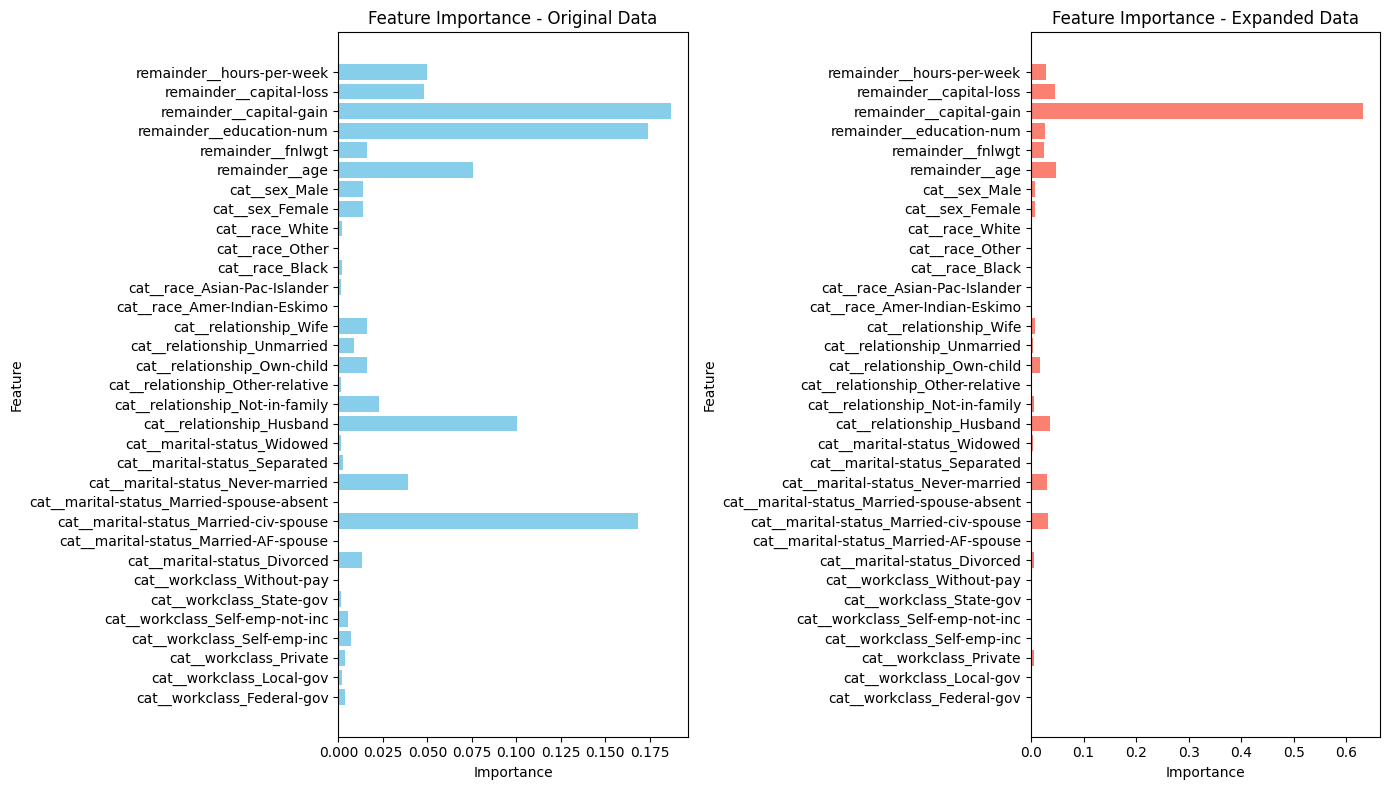

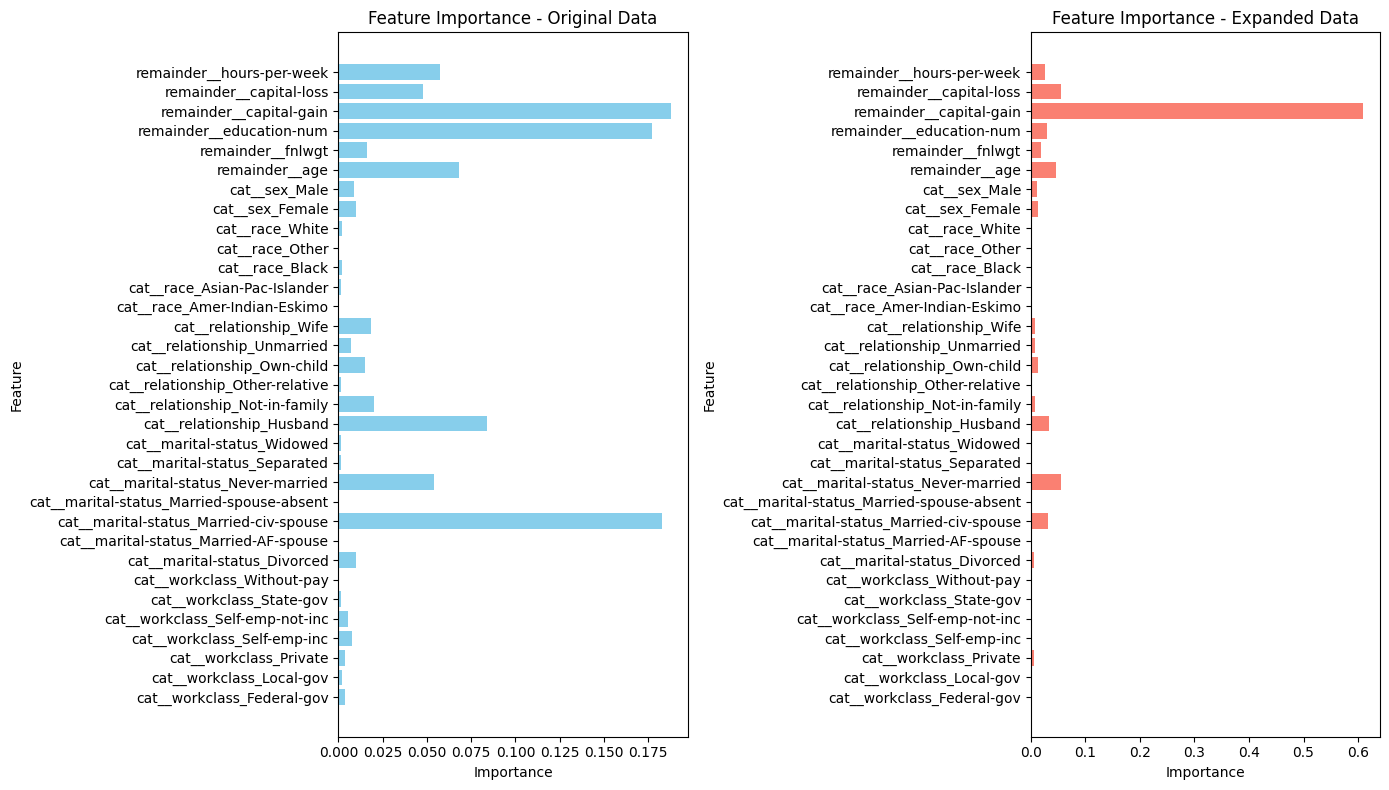

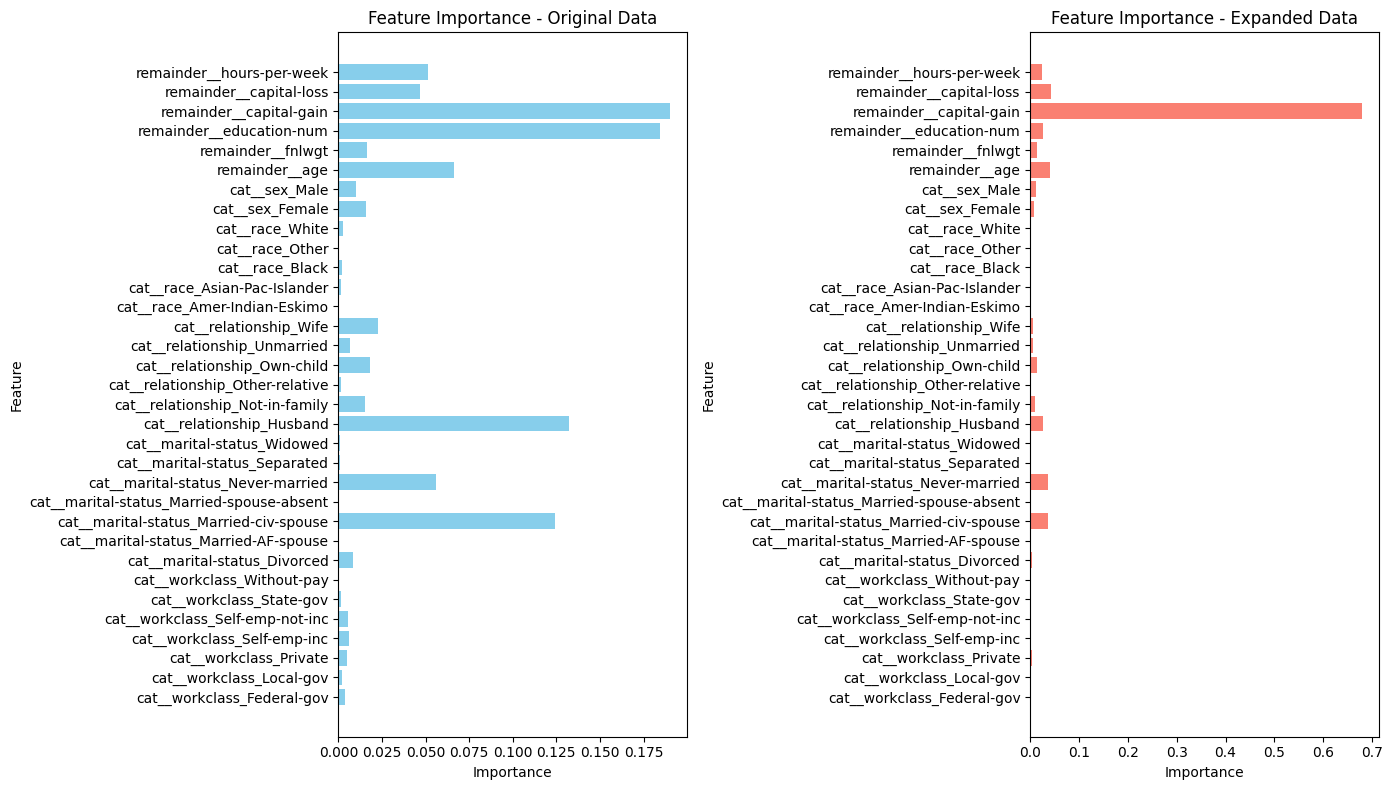

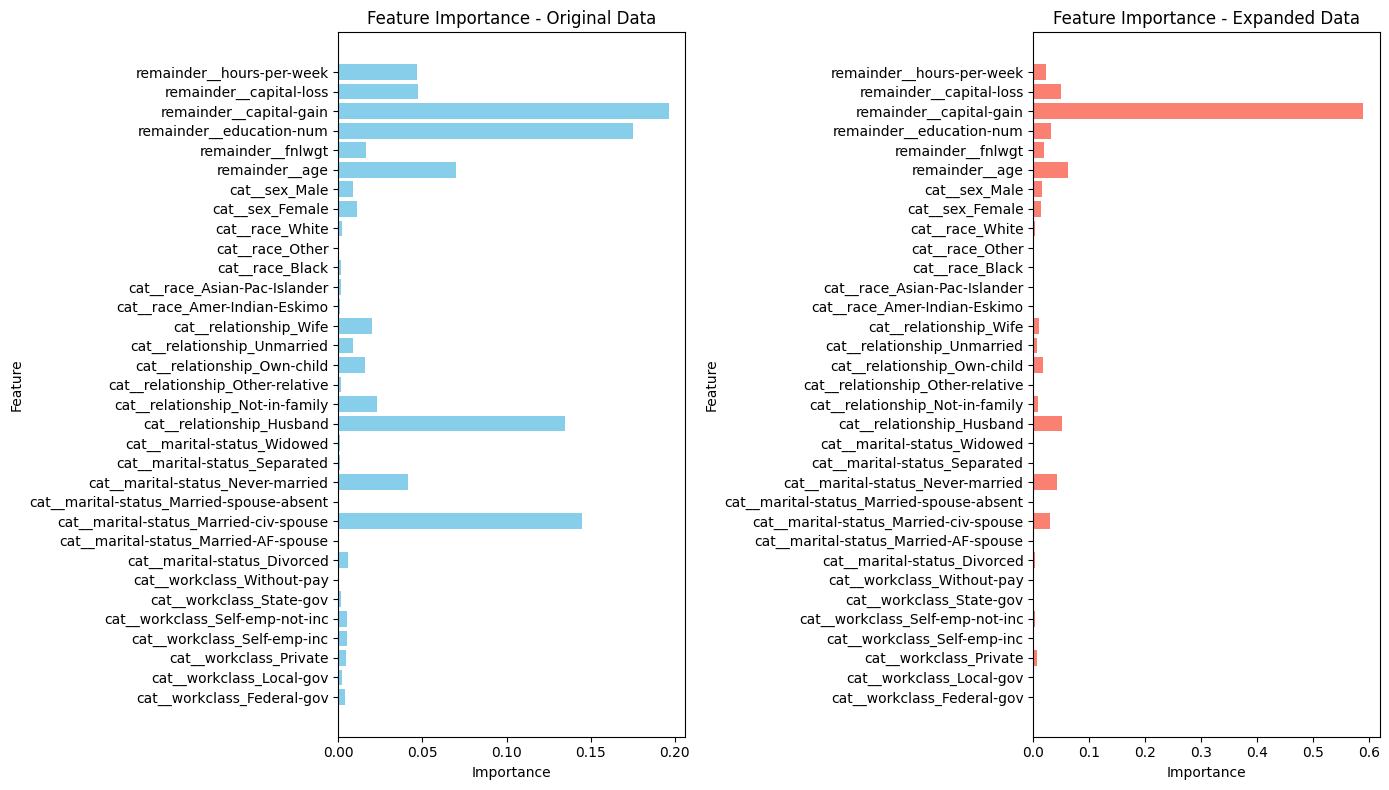

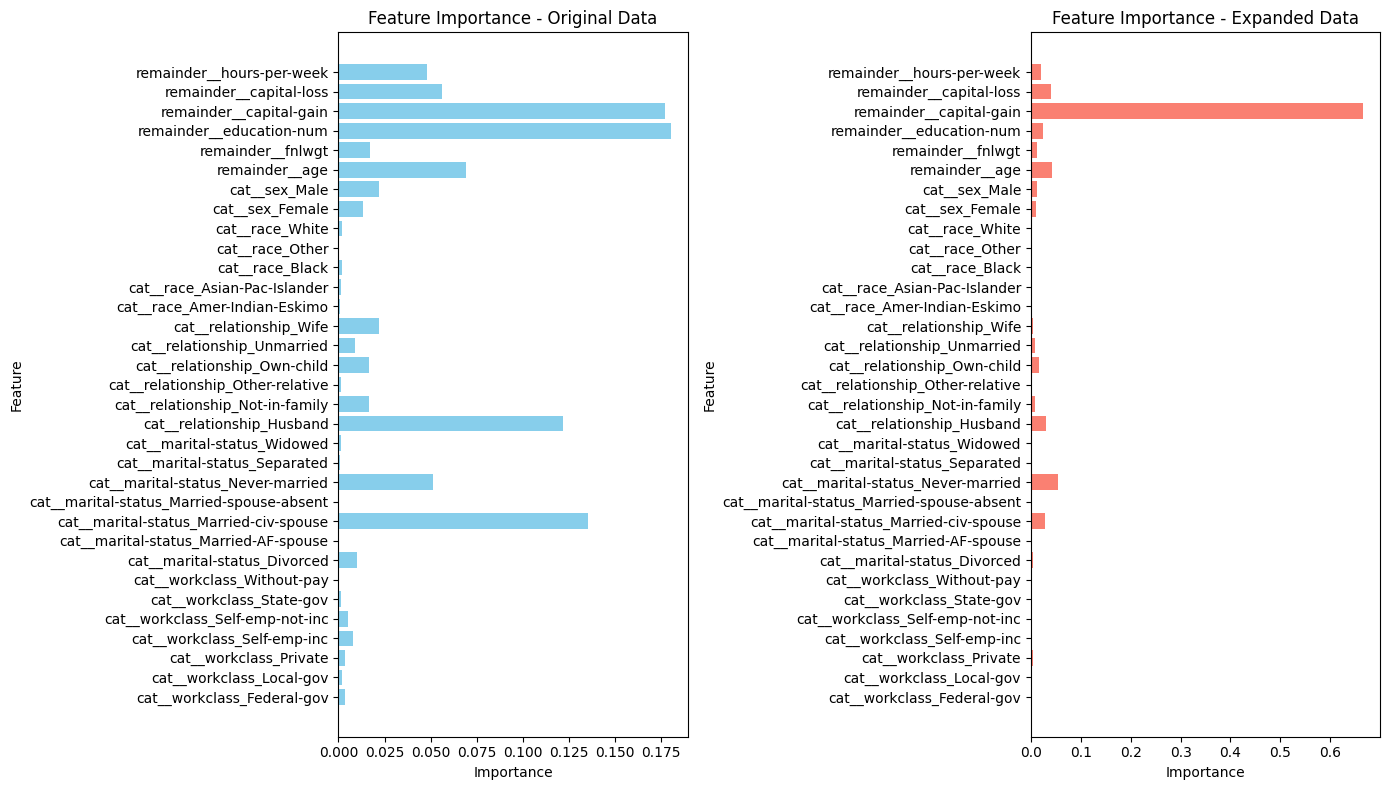

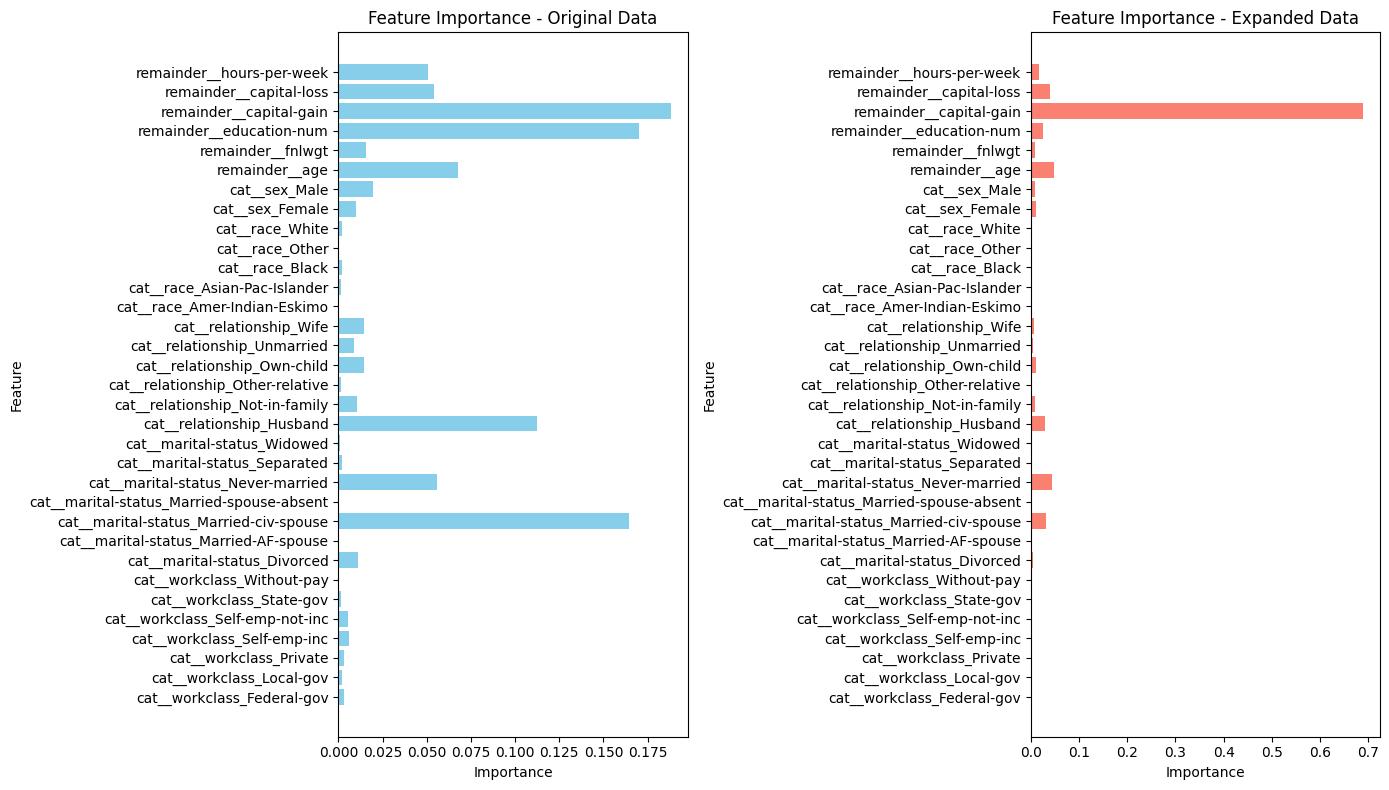

In [ ]:
"""
This script evaluates the performance of a Random Forest model trained on two datasets: the original dataset and an expanded dataset containing counterfactuals (CFs).

The following steps are executed for each combination of values in `the_list_3` and `the_list_2`:
1. Loads counterfactual data (CFs) and splits it into features (`X_expanded`) and target (`y_expanded`).
2. Preprocesses categorical features using OneHotEncoding.
3. Trains a Random Forest model on the original dataset and computes feature importances.
4. Trains the same model on the expanded dataset and computes feature importances.
5. Compares predictions made by the original and expanded models on the test dataset.
6. Analyzes and saves instances where the predictions of the original and expanded models differ.
7. Computes and stores the difference in feature importances between the original and expanded models.
8. Visualizes the feature importances for both models.

Parameters:
    X_fit (pandas.DataFrame): The training features of the original dataset.
    y_fit (pandas.Series): The target variable of the original dataset.
    X_test (pandas.DataFrame): The test features dataset.
    y_test (pandas.Series): The target variable of the test dataset.
    the_list_3 (list): A list of values corresponding to different settings or parameters related to counterfactual generation.
    the_list_2 (list): A list of values related to another dimension of counterfactual settings.
    outcome_name (str): The name of the target variable in the expanded counterfactual dataset.
    categorical (list): A list of categorical feature names for OneHotEncoding preprocessing.
    RandomForestClassifier (model): The machine learning model used for training and evaluation.

Returns:
    None: The script generates and saves:
        - Excel files containing instances where predictions differ between original and expanded models.
        - Excel files with the feature importance differences between the original and expanded models.
        - Visual plots comparing the feature importances for both datasets.
"""
    # original_data: original dataset (X_original, y_original)
    # expanded_data: expanded dataset with counterfactuals (X_expanded, y_expanded)
X_original = X_fit.copy()
y_original = y_fit.copy()    
for t in the_list_3:    
        for i in the_list_2:
            # Split datasets into features (X) and target (y)
                xxdxd = pd.read_csv('Generated_CFs/cf_df_{}_{}_1.csv'.format(i, t), index_col=0)
                X_expanded = xxdxd.drop(columns=outcome_name)
                y_expanded = xxdxd[outcome_name]

                # Preprocessing for cataegorical data - OneHotEncoding
                categorical_transformer = Pipeline(steps=[
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

                # Bundle preprocessing for data
                transformations = ColumnTransformer(
                transformers=[            
                            ('cat', categorical_transformer, categorical)],
                        remainder='passthrough')
                # Define the Random Forest model
                simple_rf = Pipeline(steps=[('preprocessor', transformations), 
                                            ('classifier', RandomForestClassifier())])

                # Train on the original dataset
                simple_rf.fit(X_original, y_original)
                importances_original = simple_rf.named_steps['classifier'].feature_importances_
                y_pred_orig = simple_rf.predict(X_test)

                # Train on the expanded dataset
                simple_rf.fit(X_expanded, y_expanded)
                importances_expanded = simple_rf.named_steps['classifier'].feature_importances_
                y_pred_exp = simple_rf.predict(X_test)

                # Compare predictions
                comparison_df = pd.DataFrame({
                    'Original_Pred': y_pred_orig,
                    'Expanded_Pred': y_pred_exp,
                    'Actual': y_test})
                differing_instances = comparison_df[comparison_df['Original_Pred'] != comparison_df['Expanded_Pred']]
                print("Instances where predictions differ:")
                print(differing_instances)
                differing_instances.to_excel('Performance_Metrics/Differing_instances_70_10_{}_{}.xlsx'.format(i,t))

                # Analyze the differing instances further
                diff_instance_ids = differing_instances.index
                original_diff_instances = X_test.loc[diff_instance_ids]
                print("Original feature values for differing instances:")
                print(original_diff_instances)
                original_diff_instances.to_excel('Performance_Metrics/Original_diff_instances_70_10_{}_{}.xlsx'.format(i,t))
                # Get the feature names after preprocessing
                feature_names = simple_rf.named_steps['preprocessor'].get_feature_names_out()

                # Debugging: Print lengths to identify the issue
                print("Length of feature_names:", len(feature_names))
                print("Length of importances_original:", len(importances_original))
                print("Length of importances_expanded:", len(importances_expanded))

                # Ensure all arrays have the same length before creating the DataFrame
                min_length = min(len(feature_names), len(importances_original), len(importances_expanded))

                feature_names = feature_names[:min_length]
                importances_original = importances_original[:min_length]
                importances_expanded = importances_expanded[:min_length]

                # Create a DataFrame to compare feature importances
                importance_df = pd.DataFrame({
                    'Feature': feature_names,
                    'Importance_Original': importances_original,
                    'Importance_Expanded': importances_expanded
                })

                # Add a new column for the difference in importance
                importance_df['Importance_Difference'] = importance_df['Importance_Expanded'] - importance_df['Importance_Original']
                # Sort by the absolute value of the importance difference
                importance_df_sorted = importance_df.reindex(importance_df['Importance_Difference'].abs().sort_values(ascending=False).index)
                importance_df_sorted.to_excel('Feature_importance_diff_50_5_{}_{}.xlsx'.format(i,t))
                # Display the top 10 most significant shifts
                top_shifts = importance_df_sorted.head(10)
                print("Top 10 Most Significant Shifts in Feature Importance:")
                top_shifts

                # Plotting the feature importances
                plt.figure(figsize=(14, 8))
                plt.subplot(1, 2, 1)
                plt.barh(feature_names, importances_original, color='skyblue')
                plt.title('Feature Importance - Original Data')
                plt.xlabel('Importance')
                plt.ylabel('Feature')

                plt.subplot(1, 2, 2)
                plt.barh(feature_names, importances_expanded, color='salmon')
                plt.title('Feature Importance - Expanded Data')
                plt.xlabel('Importance')
                plt.ylabel('Feature')

                plt.tight_layout()
                #plt.show()